# Setup

## Download Data

In [340]:
startDate = '2025-07-01' #inclusive
endDate = '2025-07-02' #not inclusive
interval = '1m'

In [341]:
import yfinance as yf
import pandas as pd
import numpy as np
# Get a list of S&P 500 tickers from Wikipedia
sp500_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500 = pd.read_html(sp500_url)[0]
tickers = sp500['Symbol'].tolist()
# Handle tickers with periods (e.g., BRK.B) for yfinance
tickers = [t.replace('.', '-') for t in tickers]
# Download historical data for tickers
data = yf.download(tickers, start=startDate, end=endDate, interval=interval, auto_adjust=True)["Close"]
data


[*********************100%***********************]  502 of 502 completed


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Datetime,,,,,,,,,,,,,,,,,,,,,
2025-07-01 13:30:00+00:00,117.260002,207.070007,185.205002,132.600006,135.615005,91.070000,298.660004,384.329987,236.320007,52.680000,...,306.989990,25.434999,98.394997,68.514999,107.989998,129.050003,148.449997,90.955002,307.540009,154.929993
2025-07-01 13:31:00+00:00,117.269997,207.860001,184.994995,133.050003,135.949997,91.070000,298.910004,384.329407,236.324997,52.580002,...,306.144989,25.375000,100.639999,68.544998,108.029999,128.699997,148.639999,NaN,307.549988,155.300003
2025-07-01 13:32:00+00:00,117.305000,206.483398,184.500000,133.550003,135.699997,91.584999,298.559998,383.084991,238.279999,52.700001,...,306.915009,25.400000,99.620003,68.570000,108.040001,129.145004,148.634995,91.019997,308.440002,154.380005
2025-07-01 13:33:00+00:00,117.110001,206.809998,184.600006,133.750000,135.500000,91.644997,298.820007,383.250000,237.720001,52.799999,...,306.709991,25.370001,99.629997,68.379997,107.612999,129.214996,NaN,90.974998,NaN,153.354996
2025-07-01 13:34:00+00:00,117.364998,207.039993,185.154999,134.279297,135.345001,91.760002,298.709991,382.720001,237.550003,52.904999,...,307.174988,25.450001,100.292702,68.320000,107.629997,129.214996,148.630005,90.985001,NaN,154.065002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-01 19:55:00+00:00,120.315002,207.985001,189.800003,135.529999,136.240005,91.669998,302.429993,392.329987,241.320007,54.275002,...,307.595001,26.209999,101.849998,68.735001,109.220001,131.035004,150.360001,93.910004,315.964996,159.074997
2025-07-01 19:56:00+00:00,120.285004,207.854996,189.895004,135.550003,136.199997,91.599998,302.675507,392.239990,241.149994,54.320000,...,307.390015,26.215000,102.000000,68.714996,109.190002,131.089996,150.335007,93.945000,316.199005,159.024994
2025-07-01 19:57:00+00:00,120.275002,207.865005,189.865005,135.509995,136.210007,91.500000,302.420013,392.220001,240.899994,54.305000,...,307.329987,26.200001,102.110001,68.724998,109.214996,131.130005,150.410004,94.029999,315.760010,159.005005


## Clean Data

In [342]:
# Count total NaNs per ticker
total_nans = data.isna().sum()
print("Total NaNs per ticker:")
print(total_nans[total_nans > 0])

Total NaNs per ticker:
Ticker
A        18
AAPL      3
ABBV      2
ABNB      5
ABT       4
       ... 
XYL      45
YUM      10
ZBH      14
ZBRA    154
ZTS       3
Length: 502, dtype: int64


### Deal With NaN Values

In [343]:
ACCEPTABLE_NAN_THRESHOLD = 0.9
# Remove any tickers that failed to download enough data
clean_data = data.dropna(axis=1, thresh=int(ACCEPTABLE_NAN_THRESHOLD * len(data)))
clean_data

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WMT,WRB,WSM,WY,WYNN,XEL,XOM,YUM,ZBH,ZTS
Datetime,,,,,,,,,,,,,,,,,,,,,
2025-07-01 13:30:00+00:00,117.260002,207.070007,185.205002,132.600006,135.615005,91.070000,298.660004,384.329987,236.320007,52.680000,...,97.855003,73.415001,162.899994,25.434999,98.394997,68.514999,107.989998,148.449997,90.955002,154.929993
2025-07-01 13:31:00+00:00,117.269997,207.860001,184.994995,133.050003,135.949997,91.070000,298.910004,384.329407,236.324997,52.580002,...,98.125000,NaN,162.899994,25.375000,100.639999,68.544998,108.029999,148.639999,NaN,155.300003
2025-07-01 13:32:00+00:00,117.305000,206.483398,184.500000,133.550003,135.699997,91.584999,298.559998,383.084991,238.279999,52.700001,...,98.300003,73.550003,162.899994,25.400000,99.620003,68.570000,108.040001,148.634995,91.019997,154.380005
2025-07-01 13:33:00+00:00,117.110001,206.809998,184.600006,133.750000,135.500000,91.644997,298.820007,383.250000,237.720001,52.799999,...,98.279999,NaN,163.750000,25.370001,99.629997,68.379997,107.612999,NaN,90.974998,153.354996
2025-07-01 13:34:00+00:00,117.364998,207.039993,185.154999,134.279297,135.345001,91.760002,298.709991,382.720001,237.550003,52.904999,...,98.250000,73.574997,NaN,25.450001,100.292702,68.320000,107.629997,148.630005,90.985001,154.065002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-01 19:55:00+00:00,120.315002,207.985001,189.800003,135.529999,136.240005,91.669998,302.429993,392.329987,241.320007,54.275002,...,98.260002,72.870003,169.210007,26.209999,101.849998,68.735001,109.220001,150.360001,93.910004,159.074997
2025-07-01 19:56:00+00:00,120.285004,207.854996,189.895004,135.550003,136.199997,91.599998,302.675507,392.239990,241.149994,54.320000,...,98.245003,72.809998,169.184998,26.215000,102.000000,68.714996,109.190002,150.335007,93.945000,159.024994
2025-07-01 19:57:00+00:00,120.275002,207.865005,189.865005,135.509995,136.210007,91.500000,302.420013,392.220001,240.899994,54.305000,...,98.239998,72.820000,169.169998,26.200001,102.110001,68.724998,109.214996,150.410004,94.029999,159.005005


In [344]:
# Define trading hours in UTC (13:30 to 20:00) and generate valid weekdays only
full_days = pd.date_range(start=startDate, end=endDate, freq='B')  # 'B' = business days (Mon–Fri)
full_index = pd.DatetimeIndex([])
for day in full_days[:-1]:  # Exclude the last day since it's not inclusive
    trading_day_minutes = pd.date_range(
        start=day.strftime('%Y-%m-%d') + ' 13:30',
        end=day.strftime('%Y-%m-%d') + ' 20:00',
        freq='1min',
        tz='UTC'
    )
    full_index = full_index.append(trading_day_minutes)

# Reindex to include all valid trading minutes
clean_data = clean_data.reindex(full_index)

# Forward and backward fill for small gaps
clean_data.ffill(inplace=True, limit=2)
clean_data.bfill(inplace=True, limit=2)
clean_data

/var/folders/gs/kw3ckzg507vcmd706g45pv4w0000gn/T/ipykernel_10565/4065491124.py:11: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  full_index = full_index.append(trading_day_minutes)


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WMT,WRB,WSM,WY,WYNN,XEL,XOM,YUM,ZBH,ZTS
2025-07-01 13:30:00+00:00,117.260002,207.070007,185.205002,132.600006,135.615005,91.070000,298.660004,384.329987,236.320007,52.680000,...,97.855003,73.415001,162.899994,25.434999,98.394997,68.514999,107.989998,148.449997,90.955002,154.929993
2025-07-01 13:31:00+00:00,117.269997,207.860001,184.994995,133.050003,135.949997,91.070000,298.910004,384.329407,236.324997,52.580002,...,98.125000,73.415001,162.899994,25.375000,100.639999,68.544998,108.029999,148.639999,90.955002,155.300003
2025-07-01 13:32:00+00:00,117.305000,206.483398,184.500000,133.550003,135.699997,91.584999,298.559998,383.084991,238.279999,52.700001,...,98.300003,73.550003,162.899994,25.400000,99.620003,68.570000,108.040001,148.634995,91.019997,154.380005
2025-07-01 13:33:00+00:00,117.110001,206.809998,184.600006,133.750000,135.500000,91.644997,298.820007,383.250000,237.720001,52.799999,...,98.279999,73.550003,163.750000,25.370001,99.629997,68.379997,107.612999,148.634995,90.974998,153.354996
2025-07-01 13:34:00+00:00,117.364998,207.039993,185.154999,134.279297,135.345001,91.760002,298.709991,382.720001,237.550003,52.904999,...,98.250000,73.574997,163.750000,25.450001,100.292702,68.320000,107.629997,148.630005,90.985001,154.065002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-01 19:56:00+00:00,120.285004,207.854996,189.895004,135.550003,136.199997,91.599998,302.675507,392.239990,241.149994,54.320000,...,98.245003,72.809998,169.184998,26.215000,102.000000,68.714996,109.190002,150.335007,93.945000,159.024994
2025-07-01 19:57:00+00:00,120.275002,207.865005,189.865005,135.509995,136.210007,91.500000,302.420013,392.220001,240.899994,54.305000,...,98.239998,72.820000,169.169998,26.200001,102.110001,68.724998,109.214996,150.410004,94.029999,159.005005
2025-07-01 19:58:00+00:00,120.320000,207.940002,189.869995,135.504700,136.220001,91.455002,302.440002,392.070007,240.929993,54.355000,...,98.209999,72.785004,169.205002,26.205000,102.150002,68.720001,109.214996,150.339996,94.040001,158.987503
2025-07-01 19:59:00+00:00,120.449997,207.860001,189.960007,135.419998,136.250000,91.500000,302.570007,392.019989,240.639999,54.450001,...,98.230003,72.839996,169.179993,26.230000,101.940002,68.720001,109.250000,150.369995,94.035004,159.199997


In [345]:
print(clean_data.isna().sum().sort_values(ascending=False).head(10))  # Top columns with missing data
print(clean_data.isna().any(axis=1).sum())  # How many rows have NaNs

Ticker
MHK     2
IR      0
NOW     0
NKE     0
NI      0
NFLX    0
NEM     0
NEE     0
NDAQ    0
NCLH    0
dtype: int64
2


In [346]:
# Drop any remaining NaN values (if any)
clean_data.dropna(inplace=True, axis=1, how='any')  # Drop columns with all NaN values
clean_data

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WMT,WRB,WSM,WY,WYNN,XEL,XOM,YUM,ZBH,ZTS
2025-07-01 13:30:00+00:00,117.260002,207.070007,185.205002,132.600006,135.615005,91.070000,298.660004,384.329987,236.320007,52.680000,...,97.855003,73.415001,162.899994,25.434999,98.394997,68.514999,107.989998,148.449997,90.955002,154.929993
2025-07-01 13:31:00+00:00,117.269997,207.860001,184.994995,133.050003,135.949997,91.070000,298.910004,384.329407,236.324997,52.580002,...,98.125000,73.415001,162.899994,25.375000,100.639999,68.544998,108.029999,148.639999,90.955002,155.300003
2025-07-01 13:32:00+00:00,117.305000,206.483398,184.500000,133.550003,135.699997,91.584999,298.559998,383.084991,238.279999,52.700001,...,98.300003,73.550003,162.899994,25.400000,99.620003,68.570000,108.040001,148.634995,91.019997,154.380005
2025-07-01 13:33:00+00:00,117.110001,206.809998,184.600006,133.750000,135.500000,91.644997,298.820007,383.250000,237.720001,52.799999,...,98.279999,73.550003,163.750000,25.370001,99.629997,68.379997,107.612999,148.634995,90.974998,153.354996
2025-07-01 13:34:00+00:00,117.364998,207.039993,185.154999,134.279297,135.345001,91.760002,298.709991,382.720001,237.550003,52.904999,...,98.250000,73.574997,163.750000,25.450001,100.292702,68.320000,107.629997,148.630005,90.985001,154.065002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-01 19:56:00+00:00,120.285004,207.854996,189.895004,135.550003,136.199997,91.599998,302.675507,392.239990,241.149994,54.320000,...,98.245003,72.809998,169.184998,26.215000,102.000000,68.714996,109.190002,150.335007,93.945000,159.024994
2025-07-01 19:57:00+00:00,120.275002,207.865005,189.865005,135.509995,136.210007,91.500000,302.420013,392.220001,240.899994,54.305000,...,98.239998,72.820000,169.169998,26.200001,102.110001,68.724998,109.214996,150.410004,94.029999,159.005005
2025-07-01 19:58:00+00:00,120.320000,207.940002,189.869995,135.504700,136.220001,91.455002,302.440002,392.070007,240.929993,54.355000,...,98.209999,72.785004,169.205002,26.205000,102.150002,68.720001,109.214996,150.339996,94.040001,158.987503
2025-07-01 19:59:00+00:00,120.449997,207.860001,189.960007,135.419998,136.250000,91.500000,302.570007,392.019989,240.639999,54.450001,...,98.230003,72.839996,169.179993,26.230000,101.940002,68.720001,109.250000,150.369995,94.035004,159.199997


# Select Pairs

## Perform PCA

In [347]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Calculate log returns
returns = np.log(clean_data / clean_data.shift(1)).dropna()
# Scale log returns
X = returns.T
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(X)
scaled_returns

array([[-0.33500348,  0.01841702, -0.45695755, ...,  0.54112304,
         1.44135406,  0.        ],
       [ 0.87224998, -2.37379065,  0.73258669, ...,  0.51846898,
        -0.66518452,  0.        ],
       [-0.73058411, -1.00753507,  0.35177103, ..., -0.05009356,
         0.56993529,  0.        ],
       ...,
       [ 0.05216859, -0.09600962,  0.15307581, ..., -0.88619827,
         0.17522574,  0.        ],
       [-0.36264382,  0.16170525, -0.02824196, ...,  0.08605232,
        -0.18816325,  0.        ],
       [ 0.41094618, -2.13153056, -2.28955265, ..., -0.28189735,
         1.80926702,  0.        ]], shape=(384, 390))

In [348]:
# Perform PCA
pca = PCA(n_components=0.85)  # Percent variance explained threshold
pca.fit(X)
print(f"Number of components: {pca.n_components_}")
print(f"Variance explained by each eigenvector: {pca.explained_variance_ratio_}")
print(f"Total: {pca.explained_variance_ratio_.sum() * 100:.2f}%")

Number of components: 91
Variance explained by each eigenvector: [0.08955865 0.08439716 0.05370522 0.03796386 0.03416816 0.03049859
 0.02363618 0.02063565 0.02026467 0.01698712 0.0165006  0.01582258
 0.01393399 0.01349871 0.01274575 0.01199511 0.01139261 0.01084463
 0.01051726 0.00988153 0.00928365 0.00887375 0.00873657 0.00867297
 0.00837724 0.00808226 0.00754586 0.00716447 0.00704669 0.00695877
 0.00682619 0.00672963 0.00631585 0.00625023 0.00617859 0.00609921
 0.00581483 0.00575666 0.00557312 0.00554067 0.00535604 0.00514715
 0.00499391 0.00487535 0.00469003 0.0046238  0.00448182 0.00444262
 0.00436789 0.00428045 0.00417766 0.00404332 0.00397705 0.00393791
 0.00386503 0.00381221 0.00371774 0.00363077 0.00358718 0.0034722
 0.00344657 0.00343935 0.00329087 0.00325882 0.0032248  0.003204
 0.00315609 0.00310731 0.00308562 0.00299864 0.00298683 0.00293346
 0.00289511 0.00281903 0.00275389 0.00270808 0.00268772 0.00264989
 0.0025907  0.00252388 0.00250675 0.00246185 0.00244566 0.00244371


### Clustering

In [349]:
"""

from sklearn.cluster import KMeans

num_clusters = 25 # Can be changed
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(X)

tickers = returns.columns
label_dict = {i: [] for i in range(num_clusters)}
for i, label in enumerate(kmeans.labels_):
    label_dict[label].append(tickers[i])
print("Clustered tickers:")
for label, tickers in label_dict.items():
    print(f"Cluster {label}: {', '.join(tickers)}")

"""

'\n\nfrom sklearn.cluster import KMeans\n\nnum_clusters = 25 # Can be changed\nkmeans = KMeans(n_clusters=num_clusters, random_state=1)\nkmeans.fit(X)\n\ntickers = returns.columns\nlabel_dict = {i: [] for i in range(num_clusters)}\nfor i, label in enumerate(kmeans.labels_):\n    label_dict[label].append(tickers[i])\nprint("Clustered tickers:")\nfor label, tickers in label_dict.items():\n    print(f"Cluster {label}: {\', \'.join(tickers)}")\n\n'

In [350]:
# Agglomerative clustering
VERBOSE = True  # Set to False to suppress verbose output
from sklearn.cluster import AgglomerativeClustering
num_clusters = 100 # Can be changed
clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clustering.fit_predict(X)
tickers = returns.columns
label_dict = {i: [] for i in range(num_clusters)}
for i, label in enumerate(clustering.labels_):
    label_dict[label].append(tickers[i])
if VERBOSE:
    # Print clustered tickers
    print("Clustered tickers:")
    for label, tickers in label_dict.items():
        print(f"{label}: {', '.join(tickers)}")

    # Count number of clusters for each size
    cluster_sizes = pd.Series([len(tickers) for tickers in label_dict.values()])
    print("\nCluster sizes:")
    print(cluster_sizes.value_counts().sort_index())   


Clustered tickers:
0: CZR, MGM
1: JBL, ORCL
2: CAG, CPB, GIS, HRL, HSY, KHC, SJM, TSN
3: AMD, AVGO, MU
4: EQT, EXE
5: FCX, INTC, TER
6: BBY, MAS, SWK
7: APD, BAX, BDX, GEHC, HOLX, IFF, PPG, ZBH
8: ACN, BRK-B, CMCSA, CSCO, CTSH, DIS, DRI, EA, EBAY, EFX, FIS, FOXA, HON, K, MSFT, NEM, PARA, PAYX, PYPL, WBA
9: IP, PKG, SW
10: AMZN, GOOG, GOOGL, META, NVDA, UBER
11: APTV, DD, HPQ, HST, SBUX, TGT
12: BF-B, STZ
13: VTRS, ZTS
14: ADBE, ADSK, CRM, DAY, GDDY, IBM, LYV, NFLX, TTWO, WDAY
15: A, DHR, IQV, TMO
16: DECK, LULU, TPR
17: COO, HCA, UHS
18: APA, HAL, SLB
19: AOS, CSX, HD, LKQ, LOW, NSC, PCAR, ROST, SHW, TSCO, UNP
20: BEN, CFG, FITB, HBAN, IVZ, KEY, MTB, PNC, RF, STT, TFC, TROW, USB
21: CHD, CME, CPRT, CTVA, ECL, FAST, FI, ICE, LDOS, LHX, LIN, LMT, MA, MCD, NDAQ, OTIS, ROL, RTX, SYY, V, WM, YUM
22: ABNB, EXPE, HLT, MAR
23: ABBV, AMGN, BMY, GILD, JNJ, LLY, MRK, PFE
24: BKR, COP, CTRA, CVX, DVN, EOG, FANG, HES, MPC, OXY, PSX, VLO, XOM
25: ACGL, AFL, AIG, ALL, CB, HIG, MET, PGR, PRU, WRB
26: 

In [351]:
# Get two most similar tickers from each cluster with more than 1 ticker
similar_tickers = {}
for label, tickers in label_dict.items():
    if len(tickers) > 1:
        # Calculate pairwise correlation matrix for tickers in the cluster
        cluster_data = clean_data[tickers]
        corr_matrix = cluster_data.corr()
        
        # Get the two most similar tickers based on correlation
        most_similar = corr_matrix.unstack().sort_values(ascending=False)
        most_similar = most_similar[most_similar < 1]  # Exclude self-correlations
        top_pairs = most_similar.head(2).index.tolist()
        
        similar_tickers[label] = top_pairs
# Print the most similar tickers for each cluster
print("\nMost similar tickers in each cluster:")
for label, pairs in similar_tickers.items():
    print(f"Cluster {label}: {pairs[0]}")


Most similar tickers in each cluster:
Cluster 0: ('CZR', 'MGM')
Cluster 1: ('JBL', 'ORCL')
Cluster 2: ('TSN', 'KHC')
Cluster 3: ('AMD', 'MU')
Cluster 4: ('EQT', 'EXE')
Cluster 5: ('INTC', 'TER')
Cluster 6: ('BBY', 'SWK')
Cluster 7: ('BDX', 'ZBH')
Cluster 8: ('CTSH', 'EFX')
Cluster 9: ('IP', 'PKG')
Cluster 10: ('GOOG', 'GOOGL')
Cluster 11: ('DD', 'APTV')
Cluster 12: ('BF-B', 'STZ')
Cluster 13: ('VTRS', 'ZTS')
Cluster 14: ('NFLX', 'IBM')
Cluster 15: ('A', 'IQV')
Cluster 16: ('DECK', 'LULU')
Cluster 17: ('HCA', 'UHS')
Cluster 18: ('HAL', 'SLB')
Cluster 19: ('UNP', 'NSC')
Cluster 20: ('USB', 'FITB')
Cluster 21: ('MA', 'V')
Cluster 22: ('ABNB', 'MAR')
Cluster 23: ('PFE', 'MRK')
Cluster 24: ('HES', 'CVX')
Cluster 25: ('PRU', 'MET')
Cluster 26: ('NUE', 'STLD')
Cluster 27: ('KMI', 'WMB')
Cluster 28: ('CI', 'CVS')
Cluster 29: ('KR', 'MO')
Cluster 30: ('TXN', 'ADI')
Cluster 31: ('FTNT', 'PANW')
Cluster 32: ('PNR', 'IR')
Cluster 34: ('F', 'GM')
Cluster 35: ('COF', 'AXP')
Cluster 37: ('WY', 'ARE'

### Perform Cointegration Testing on Pairs

In [352]:
# Import from src.cointegration
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.cointegration import engle_granger

# Perform engle-granger cointegration test on the pairs

cointegration_results = {}
for label, pairs in similar_tickers.items():
    ticker1, ticker2 = pairs[0]
    result = engle_granger(np.log(clean_data[ticker1]), np.log(clean_data[ticker2]))
    cointegration_results[(ticker1, ticker2)] = result

# Print cointegration results
print("\nCointegration results:")
for (ticker1, ticker2), result in sorted(cointegration_results.items(), key=lambda x: x[1]):
    print(f"{ticker1} and {ticker2}: p-value = {result[1]:.6f}")


Cointegration results:
UNP and NSC: p-value = 0.000002
KMI and WMB: p-value = 0.000016
KR and MO: p-value = 0.000023
USB and FITB: p-value = 0.000027
NFLX and IBM: p-value = 0.000041
DUK and AEE: p-value = 0.000068
WY and ARE: p-value = 0.000081
BDX and ZBH: p-value = 0.000116
CARR and AME: p-value = 0.000389
STX and WDC: p-value = 0.000902
DHI and LEN: p-value = 0.001867
TSN and KHC: p-value = 0.002966
CI and CVS: p-value = 0.003090
MMC and TRV: p-value = 0.003690
IPG and OMC: p-value = 0.004035
COF and AXP: p-value = 0.004460
PNR and IR: p-value = 0.004550
TXN and ADI: p-value = 0.005589
MA and V: p-value = 0.005640
ABNB and MAR: p-value = 0.008692
EXPD and UPS: p-value = 0.010111
CTSH and EFX: p-value = 0.011150
AMD and MU: p-value = 0.011653
NUE and STLD: p-value = 0.015095
PRU and MET: p-value = 0.017675
CCL and RCL: p-value = 0.018757
A and IQV: p-value = 0.019256
VTRS and ZTS: p-value = 0.019305
TAP and AMCR: p-value = 0.021746
DAL and UAL: p-value = 0.023944
BBY and SWK: p-val

### Plot Best Pairs

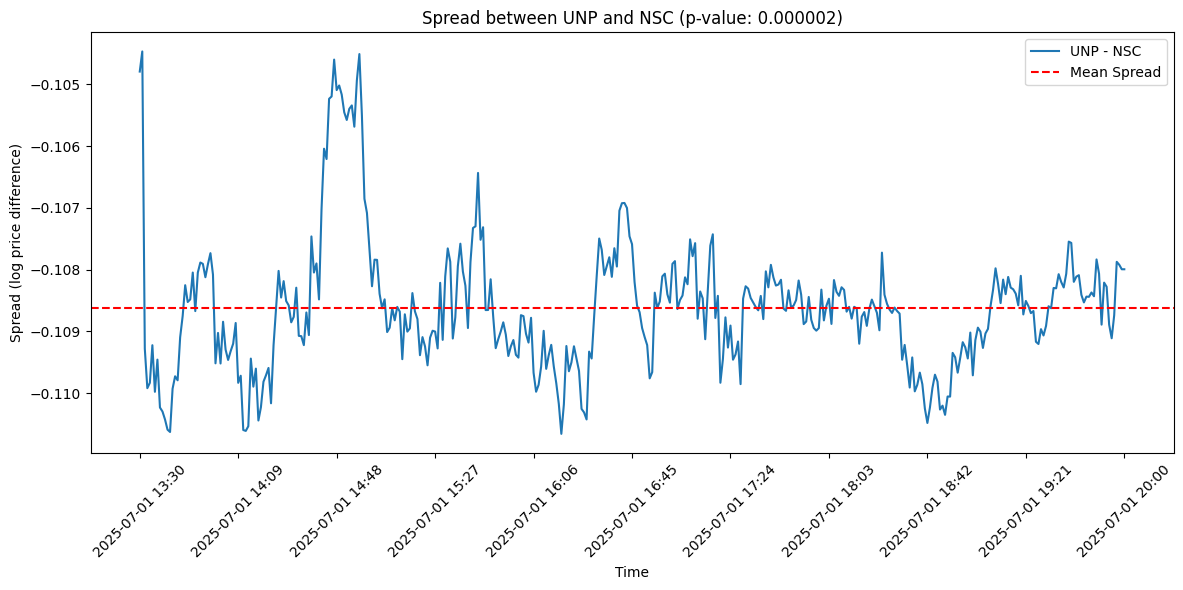

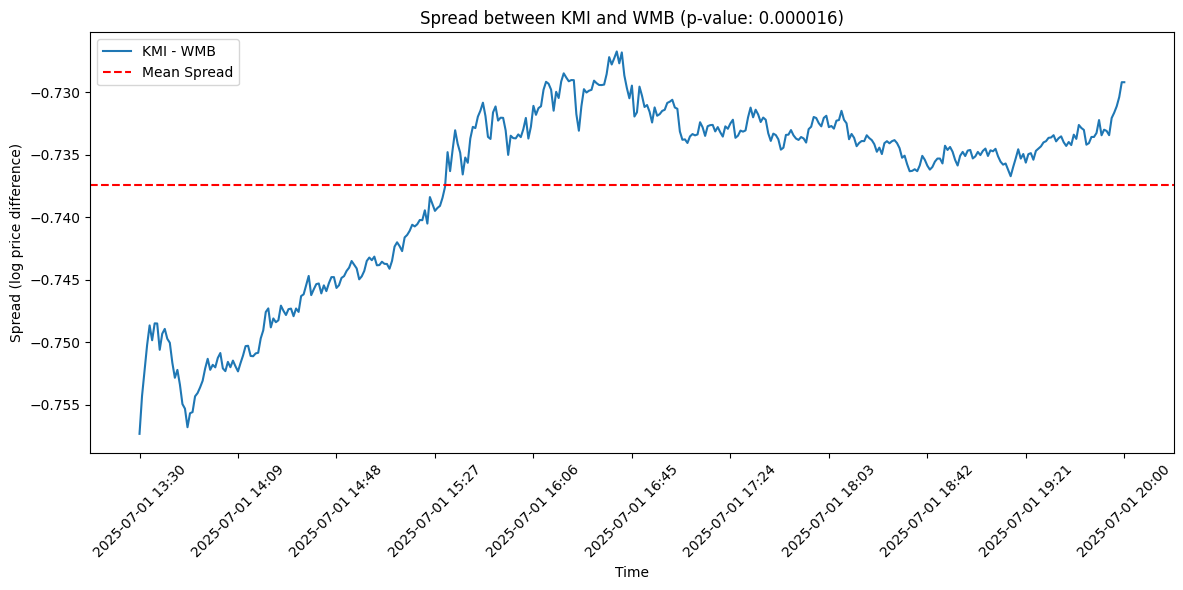

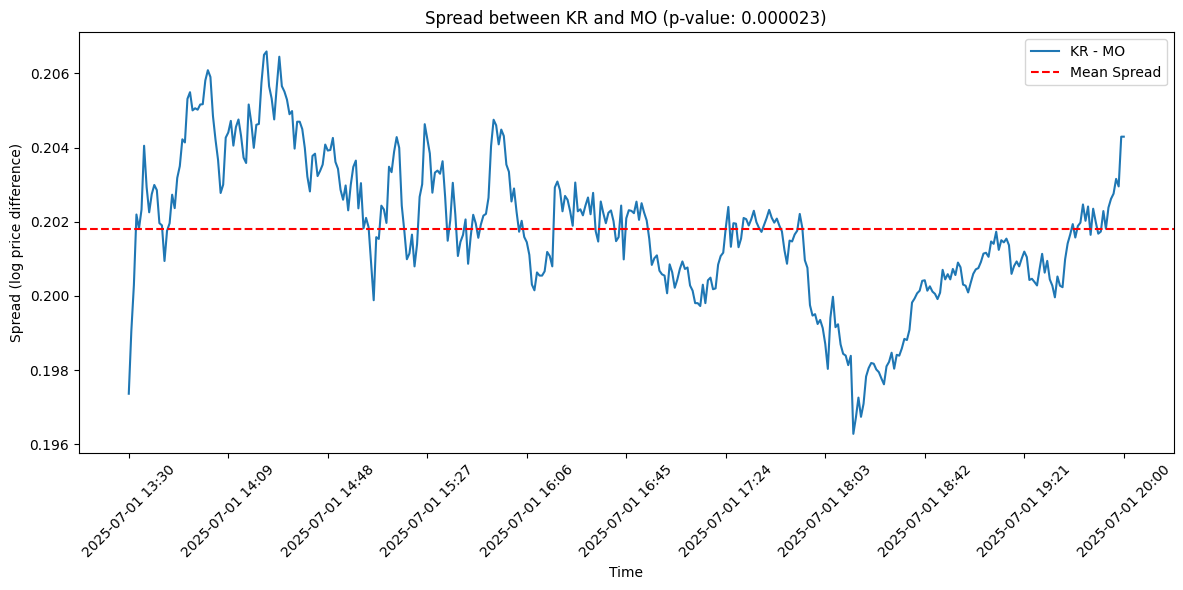

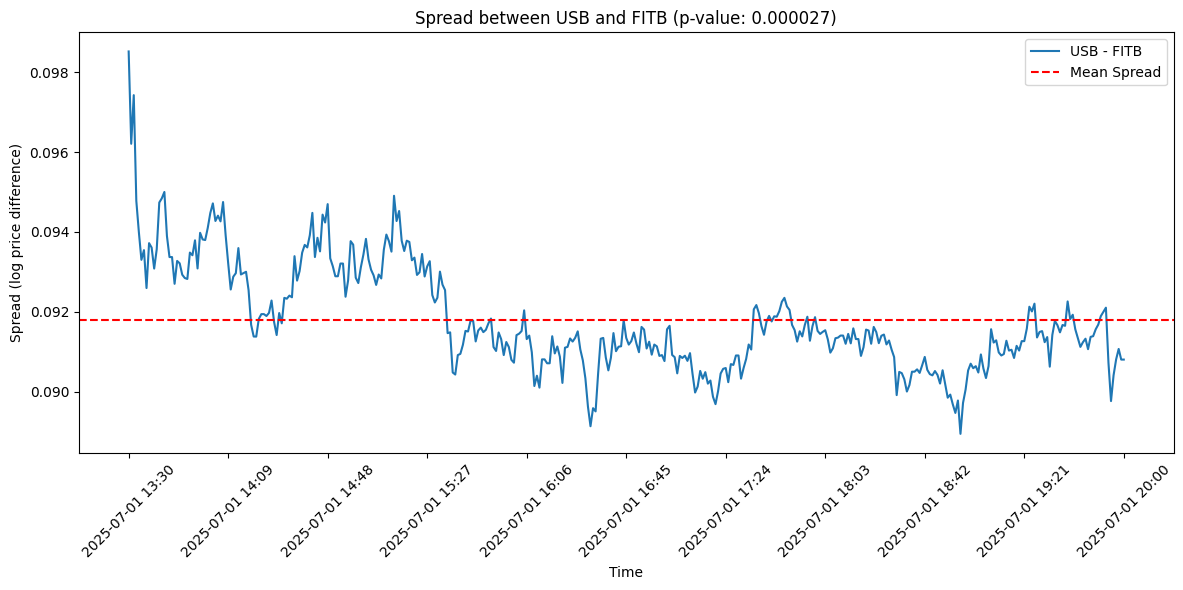

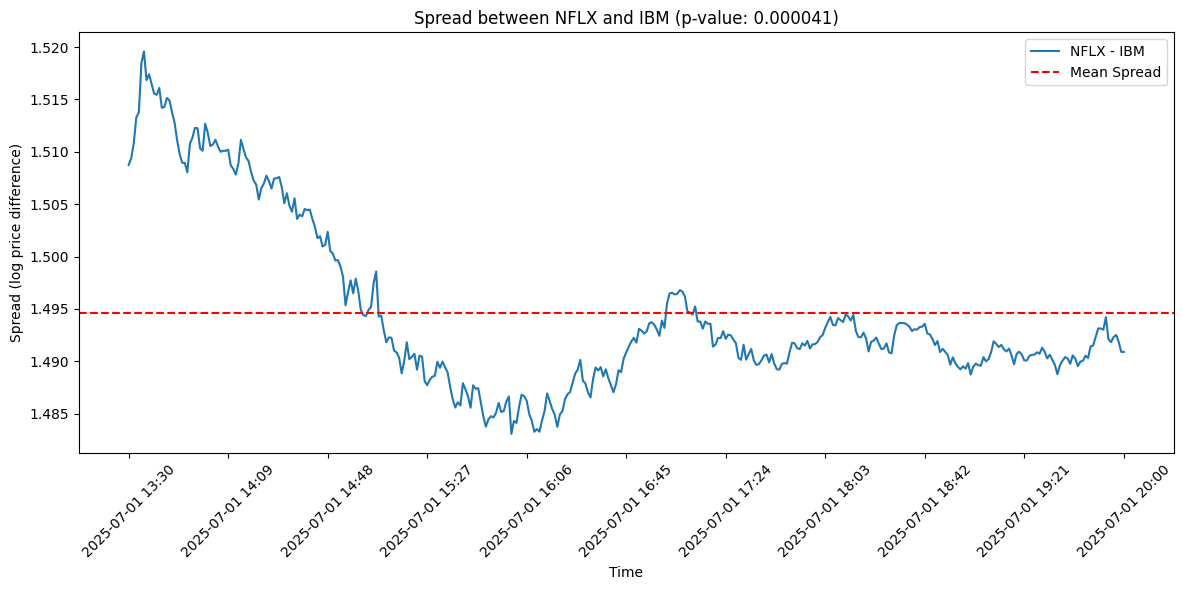

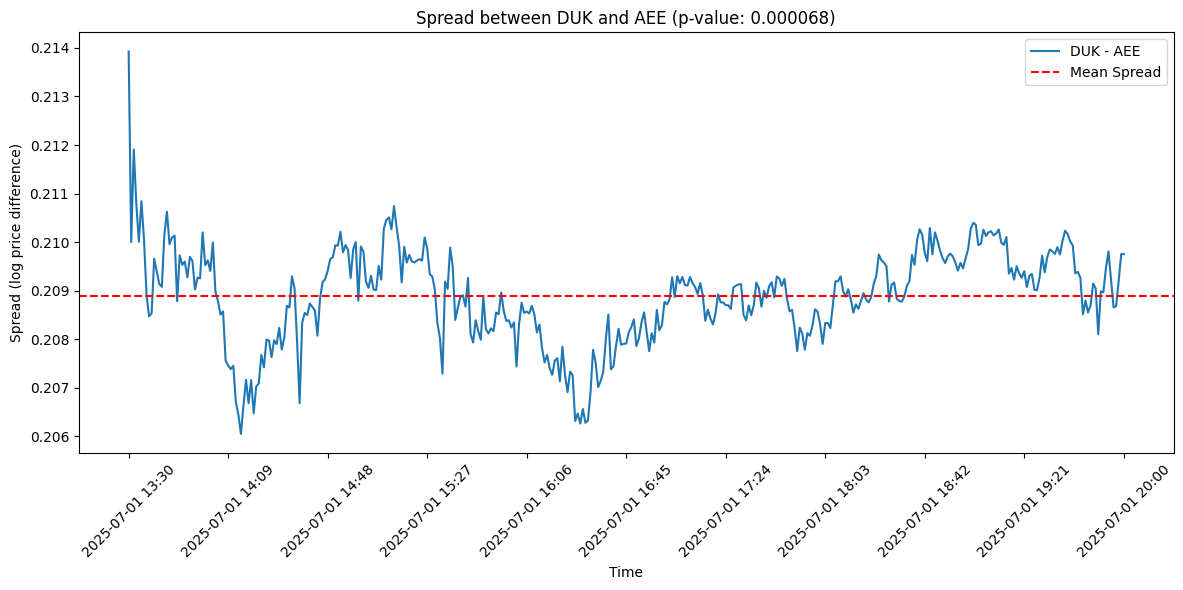

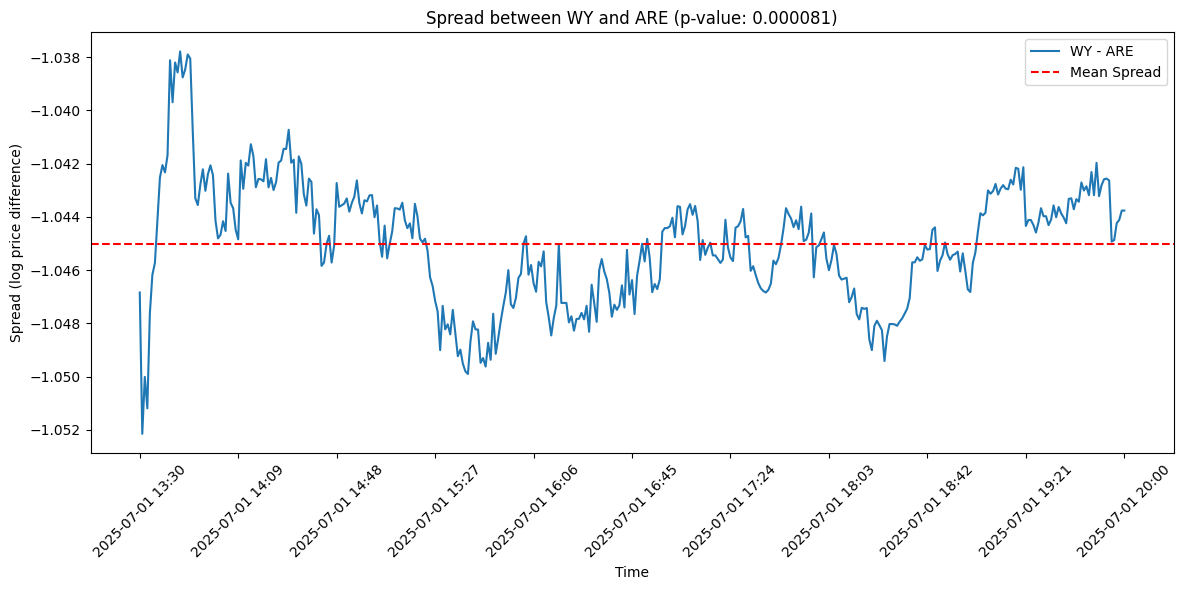

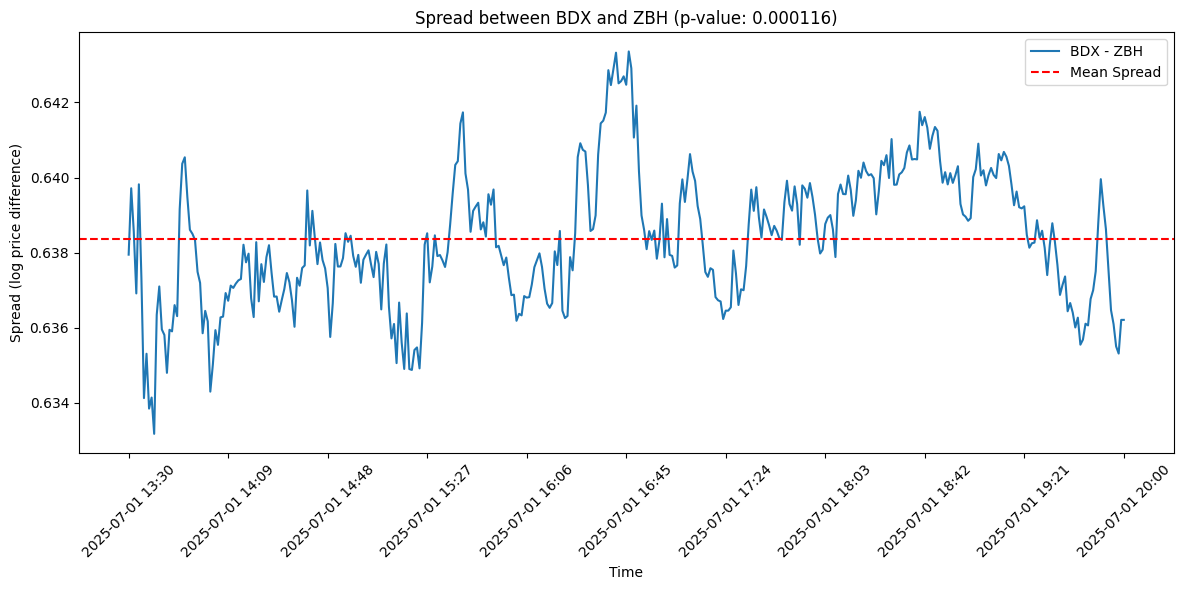

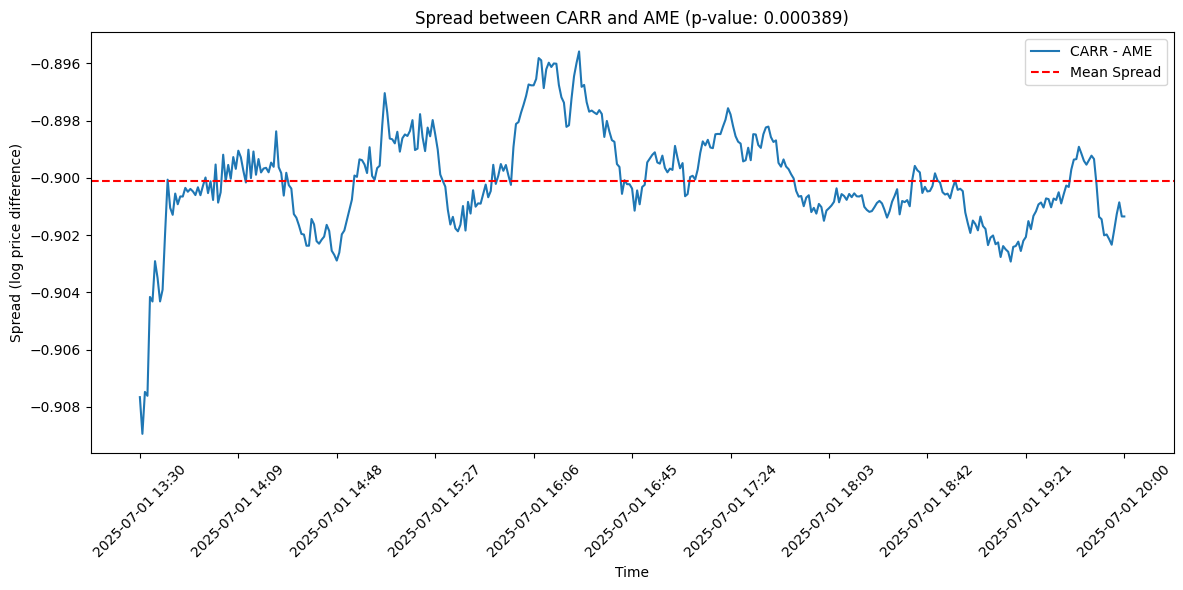

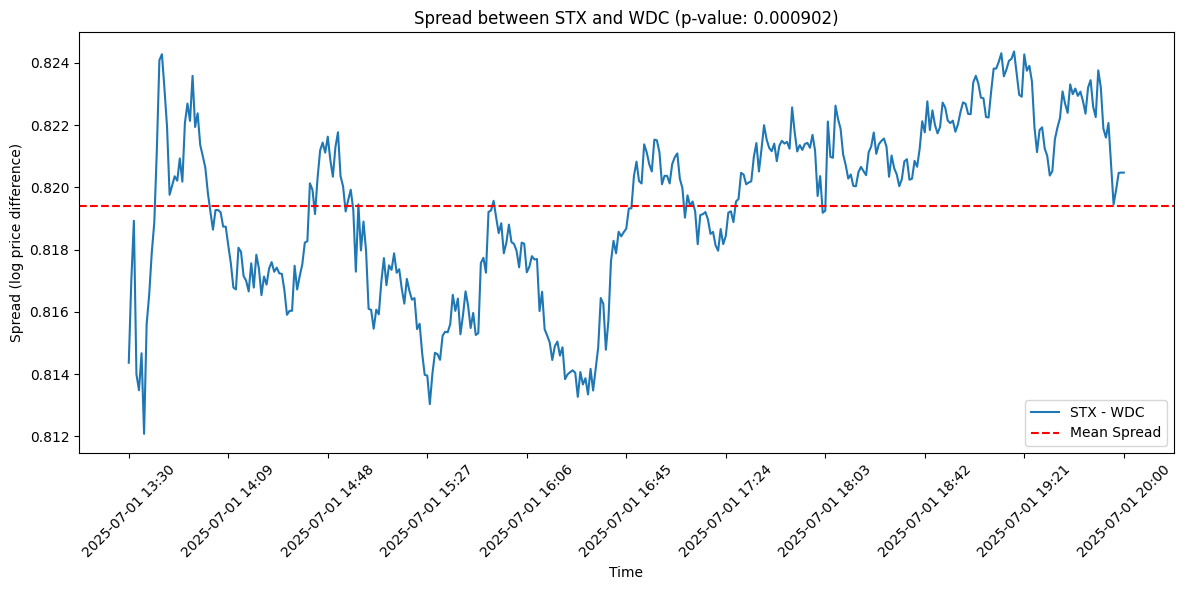

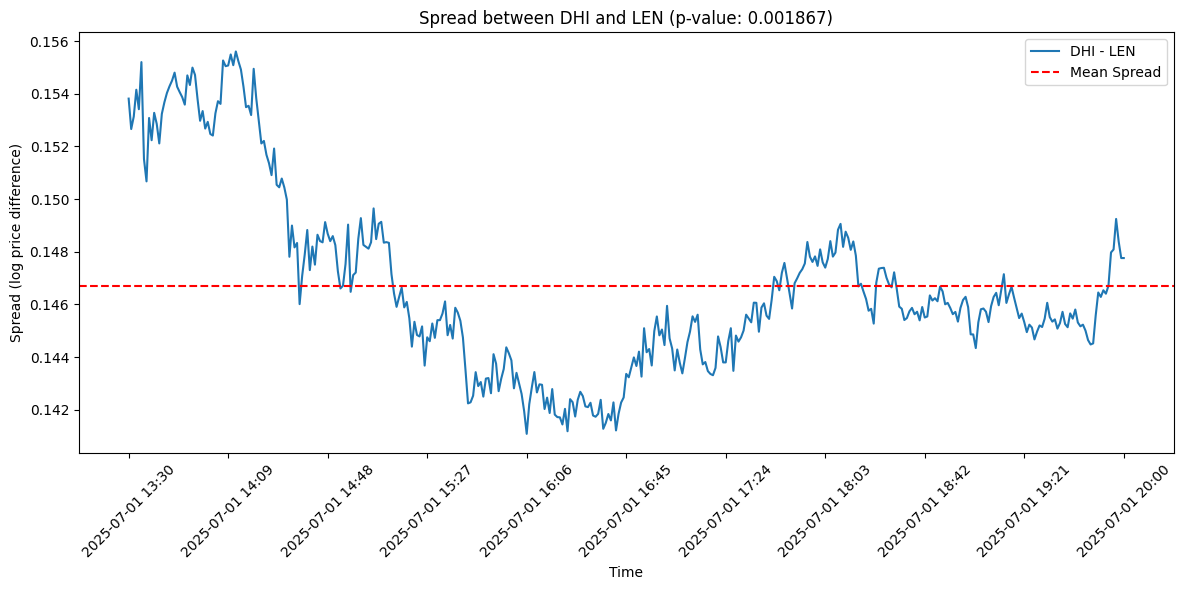

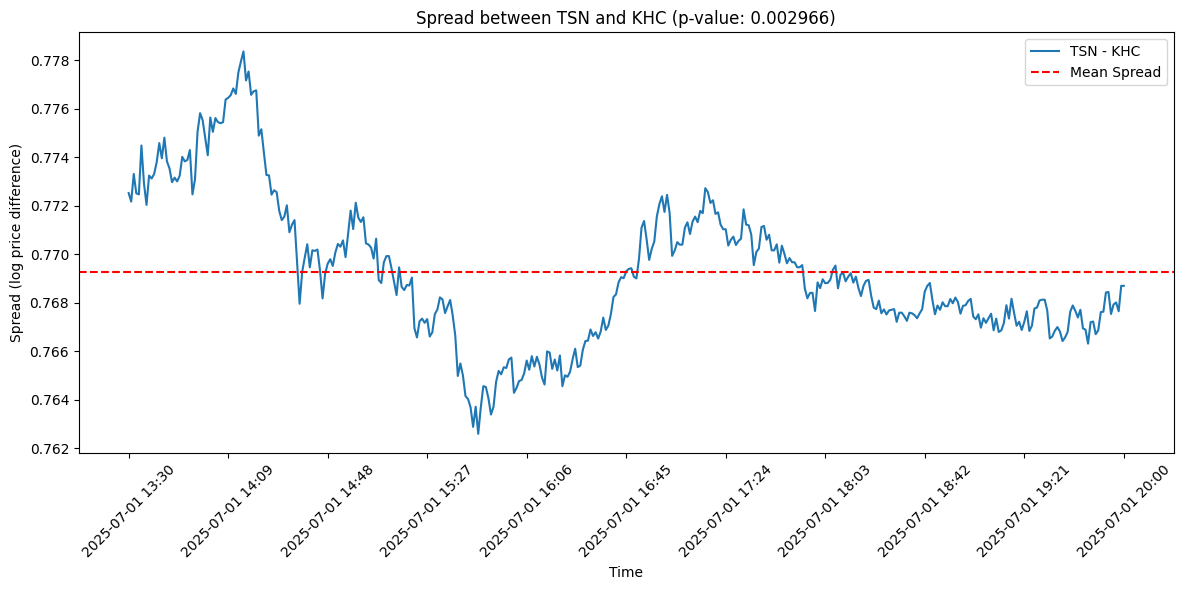

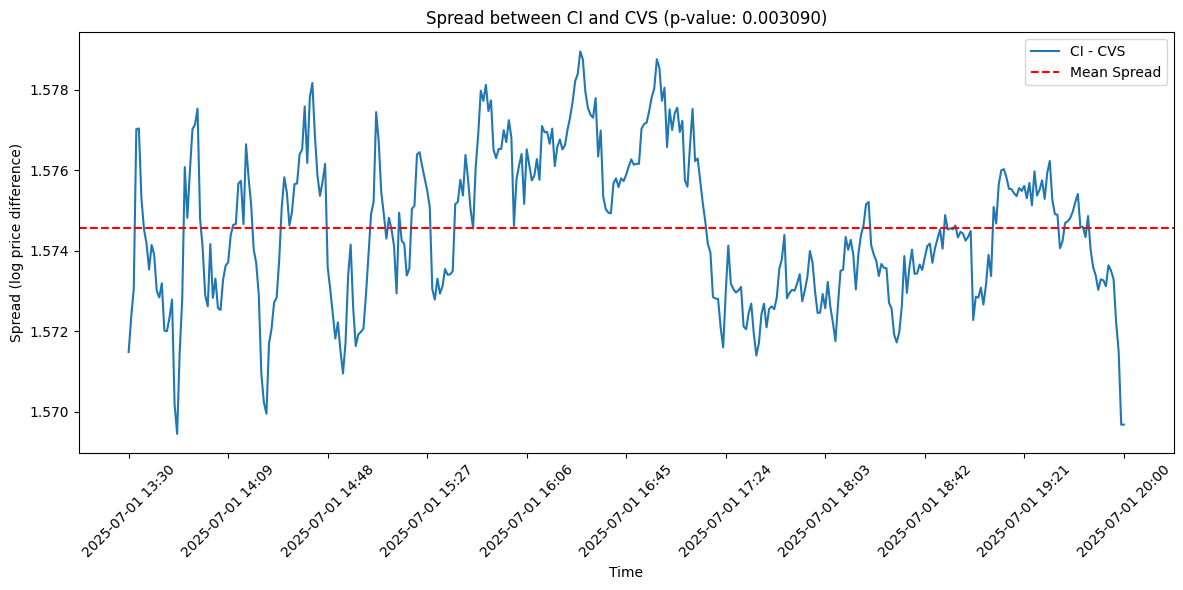

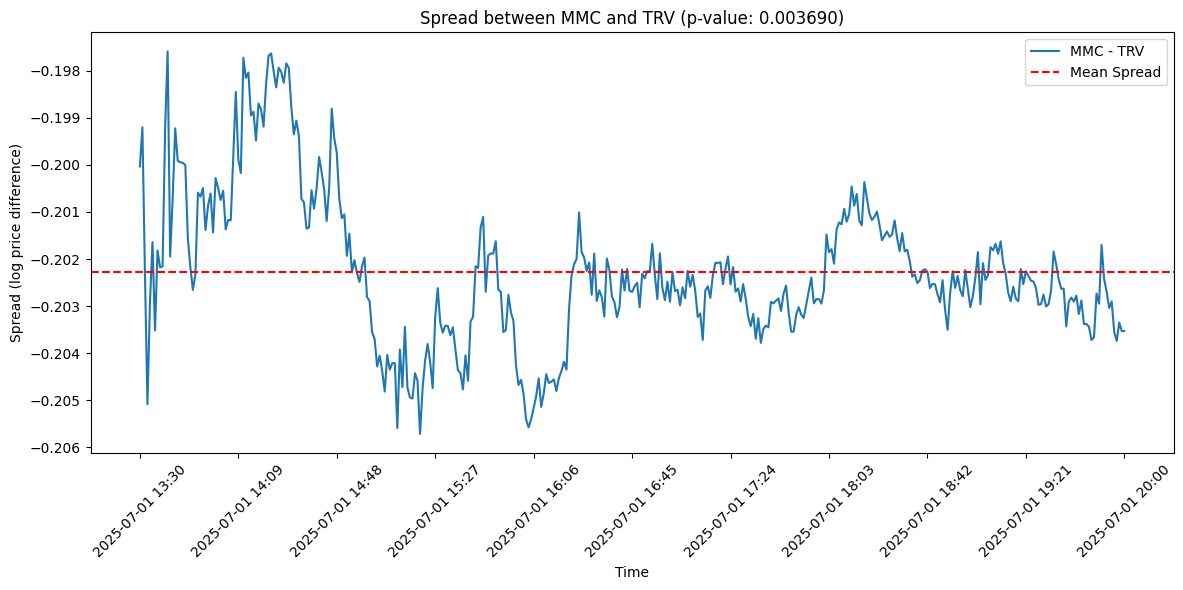

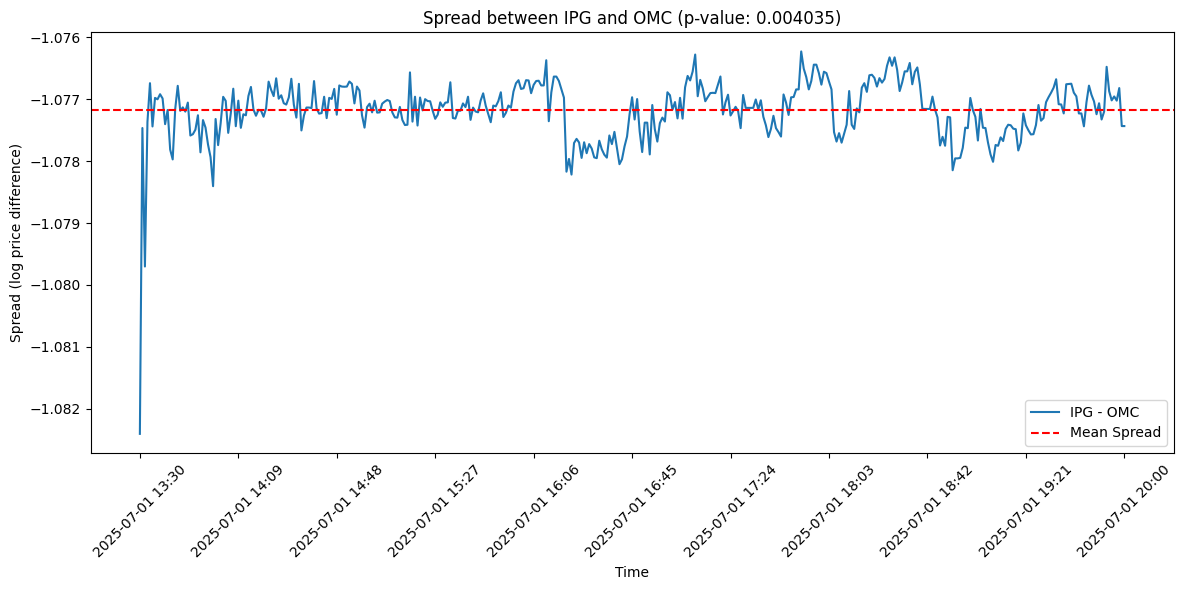

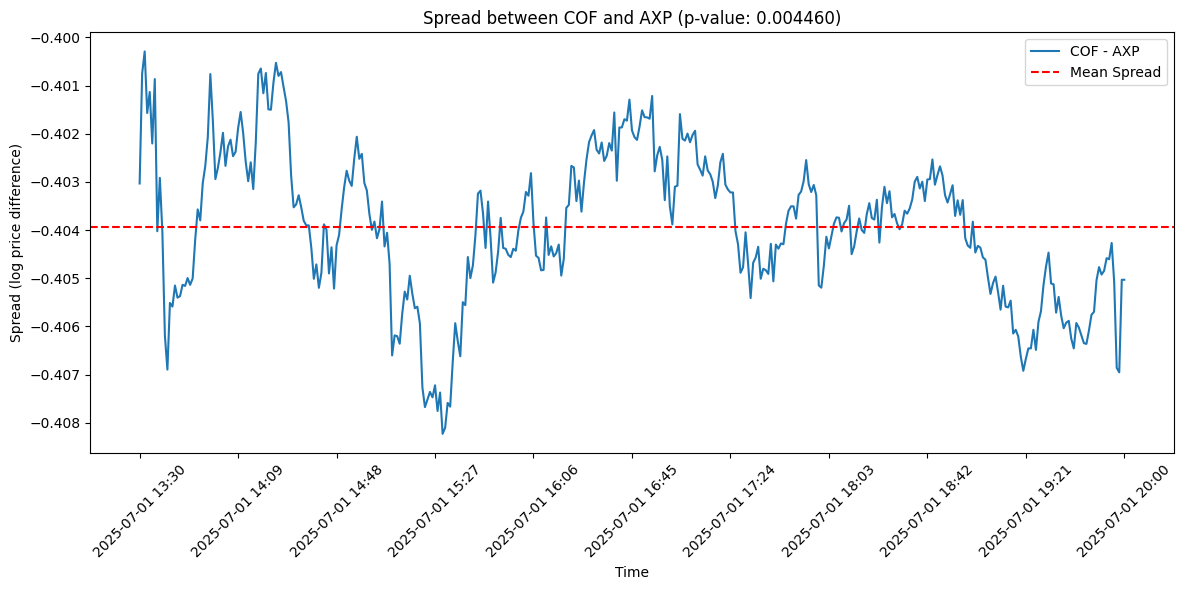

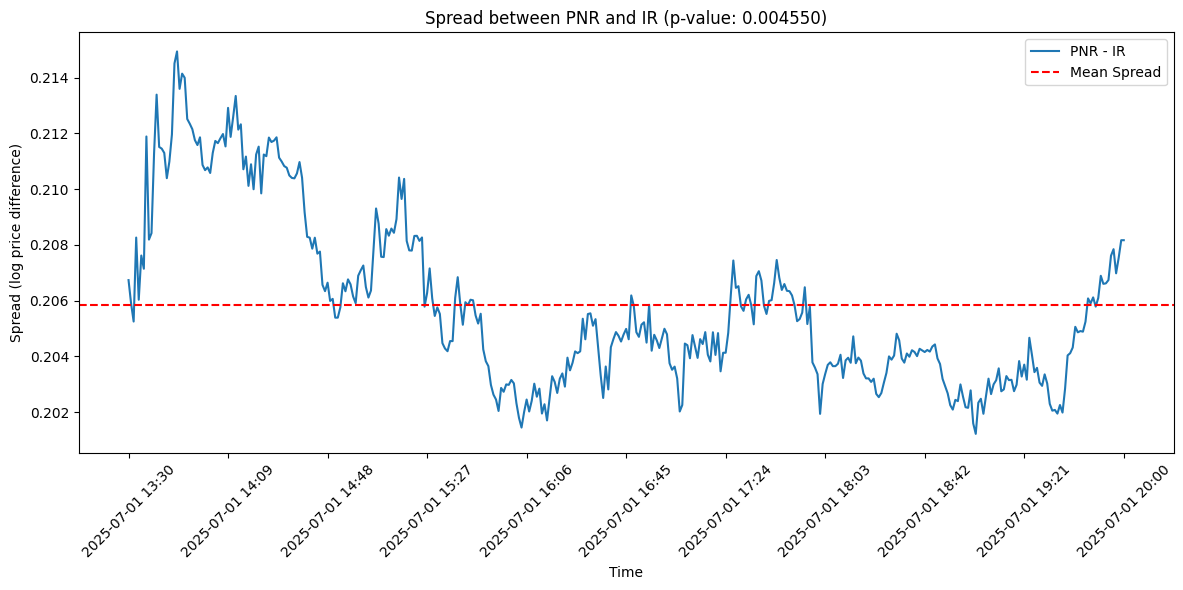

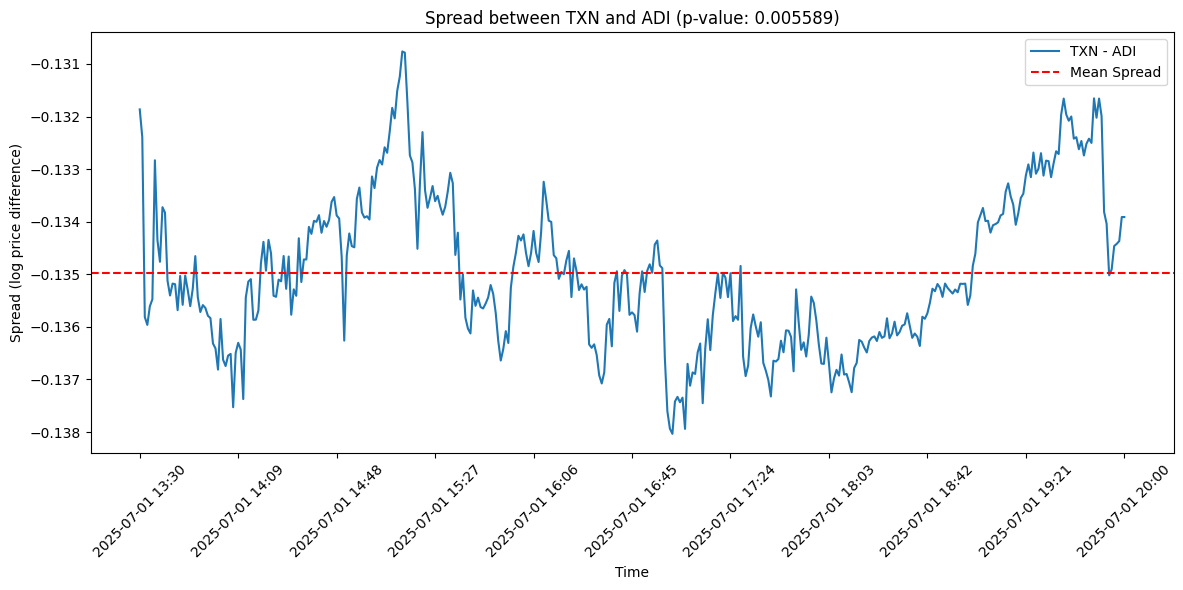

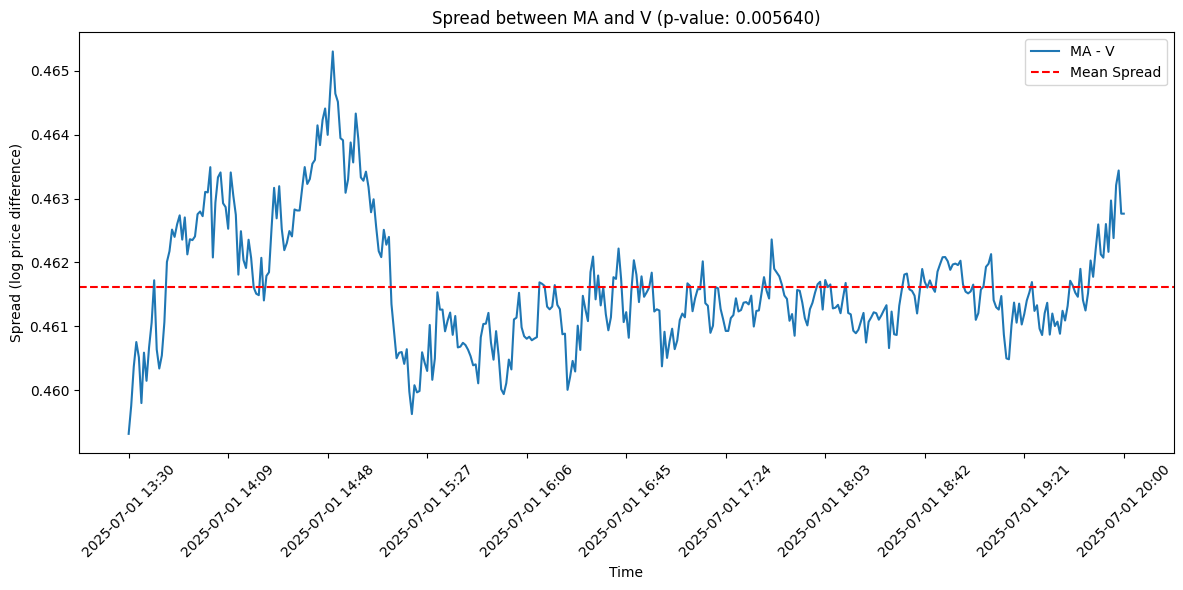

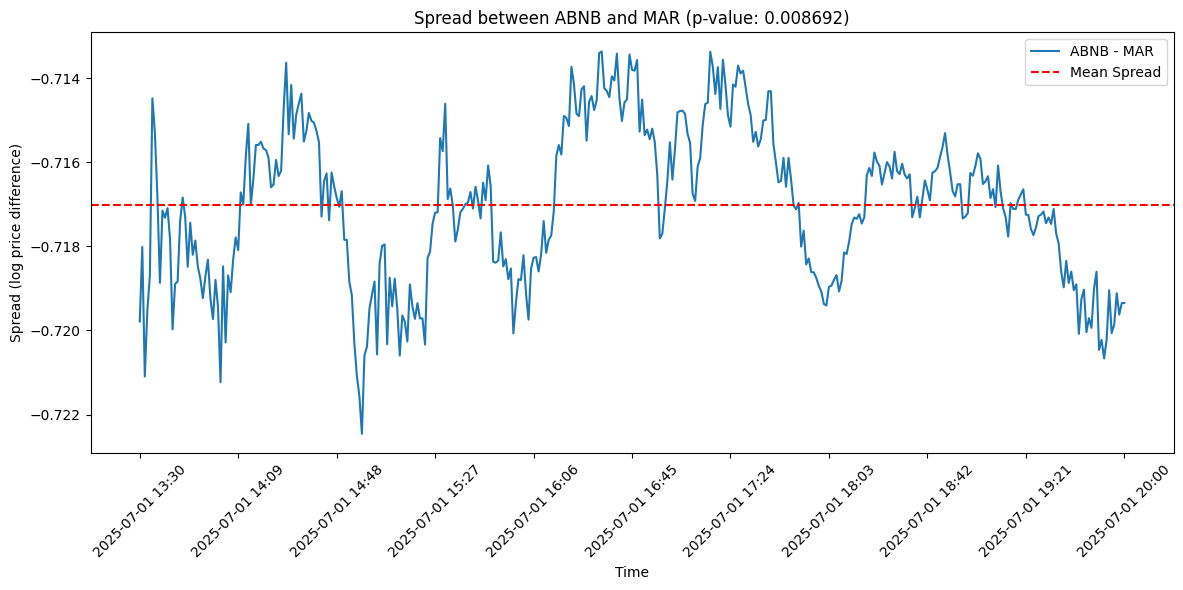

In [354]:
import matplotlib.pyplot as plt

for (ticker1, ticker2), result in sorted(cointegration_results.items(), key=lambda x: x[1]):
    p_value = result[1]
    if p_value < 0.01:
        spread = np.log(clean_data[ticker1]) - np.log(clean_data[ticker2])        
        # Convert index to string so matplotlib doesn’t interpret as continuous time
        x_vals = spread.index.strftime('%Y-%m-%d %H:%M')
        
        plt.figure(figsize=(12, 6))
        plt.plot(x_vals, spread.values, label=f"{ticker1} - {ticker2}")
        plt.title(f"Spread between {ticker1} and {ticker2} (p-value: {p_value:.6f})")
        plt.xlabel("Time")
        plt.ylabel("Spread (log price difference)")
        plt.axhline(spread.mean(), color='red', linestyle='--', label='Mean Spread')
        plt.xticks(ticks=range(0, len(x_vals), len(x_vals) // 10), labels=x_vals[::len(x_vals) // 10], rotation=45)
        plt.tight_layout()
        plt.legend()
        plt.show()